<a href="https://colab.research.google.com/github/Fredrick219/Kaggle/blob/main/2_Steel_plate_defect_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Steel_plate /train.csv').set_index("id")
test = pd.read_csv('/content/drive/MyDrive/Steel_plate /test.csv').set_index("id")
samplesub = pd.read_csv('/content/drive/MyDrive/Steel_plate /sample_submission.csv').set_index("id")

In [5]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [6]:
train.head(5).T

id,0,1,2,3,4
X_Minimum,584.0000,808.0000,3.900000e+01,7.810000e+02,1540.0000
X_Maximum,590.0000,816.0000,1.920000e+02,7.890000e+02,1560.0000
Y_Minimum,909972.0000,728350.0000,2.212076e+06,3.353146e+06,618457.0000
Y_Maximum,909977.0000,728372.0000,2.212144e+06,3.353173e+06,618502.0000
Pixels_Areas,16.0000,433.0000,1.138800e+04,2.100000e+02,521.0000
X_Perimeter,8.0000,20.0000,7.050000e+02,1.600000e+01,72.0000
Y_Perimeter,5.0000,54.0000,4.200000e+02,2.900000e+01,67.0000
Sum_of_Luminosity,2274.0000,44478.0000,1.311391e+06,3.202000e+03,48231.0000
Minimum_of_Luminosity,113.0000,70.0000,2.900000e+01,1.140000e+02,82.0000
Maximum_of_Luminosity,140.0000,111.0000,1.410000e+02,1.340000e+02,111.0000


In [7]:
target_classes = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
targets_bin = train[target_classes]

train = train.drop(target_classes, axis="columns")

In [8]:
targets_bin.sum(axis=0)

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

In [9]:
targets_bin.sum(axis=1).value_counts()

1    18380
0      818
2       21
dtype: int64

In [10]:
targets_bin[targets_bin.sum(axis=1)==2]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
634,0,0,1,0,0,0,1
752,0,0,1,0,0,0,1
3572,0,0,1,0,0,1,0
4416,0,0,1,0,0,0,1
4530,0,0,1,0,0,0,1
4664,0,0,1,0,0,0,1
6448,0,0,1,0,0,0,1
7589,0,0,1,0,0,0,1
8075,0,0,1,0,0,0,1


In [11]:
target_classes = ["Zero_Defects", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

In [12]:
target = targets_bin@(np.arange(targets_bin.shape[1]) + 1)
target[targets_bin.sum(axis=1)==2] = 3

In [13]:
target.value_counts() / len(target)

7    0.340288
6    0.247724
3    0.178573
1    0.076227
2    0.059837
0    0.042562
4    0.029554
5    0.025235
dtype: float64

<ipython-input-14-53f6351f94ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target, palette=color_list)
<ipython-input-14-53f6351f94ca>:9: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=target, palette=color_list)
<ipython-input-14-53f6351f94ca>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(target_classes)
<ipython-input-14-53f6351f94ca>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=8)


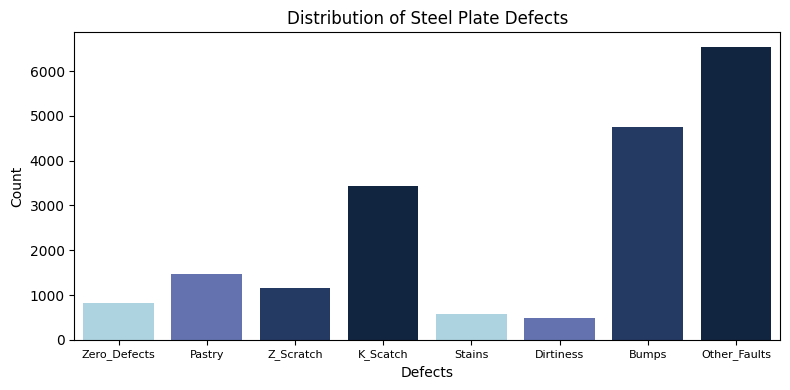

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=target, palette=color_list)
ax.set_xticklabels(target_classes)

plt.title('Distribution of Steel Plate Defects')
plt.xlabel('Defects')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=8)
plt.tight_layout()
plt.show()

In [15]:
train.nunique()

X_Minimum                1191
X_Maximum                1259
Y_Minimum                3345
Y_Maximum                3341
Pixels_Areas             1154
X_Perimeter               460
Y_Perimeter               331
Sum_of_Luminosity        2595
Minimum_of_Luminosity     162
Maximum_of_Luminosity      98
Length_of_Conveyer         99
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      27
Edges_Index              1849
Empty_Index              1748
Square_Index             1118
Outside_X_Index           525
Edges_X_Index            1102
Edges_Y_Index             900
Outside_Global_Index        4
LogOfAreas               1072
Log_X_Index               206
Log_Y_Index               241
Orientation_Index        1598
Luminosity_Index         2046
SigmoidOfAreas            467
dtype: int64

In [16]:
train.TypeOfSteel_A300.value_counts()

0    11480
1     7739
Name: TypeOfSteel_A300, dtype: int64

In [17]:
train.TypeOfSteel_A400.value_counts()

1    11461
0     7758
Name: TypeOfSteel_A400, dtype: int64

In [18]:
train.Steel_Plate_Thickness.value_counts()

40     7625
70     3703
80     1661
100    1433
50     1011
60      856
200     748
300     434
175     396
69      283
90      211
150     191
120     164
143     138
185     116
220     105
130      44
125      24
85       21
211      18
290      11
250       8
140       8
180       7
159       1
81        1
86        1
Name: Steel_Plate_Thickness, dtype: int64

In [19]:
train.Outside_Global_Index.value_counts()

1.0    11022
0.0     7490
0.5      706
0.7        1
Name: Outside_Global_Index, dtype: int64

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


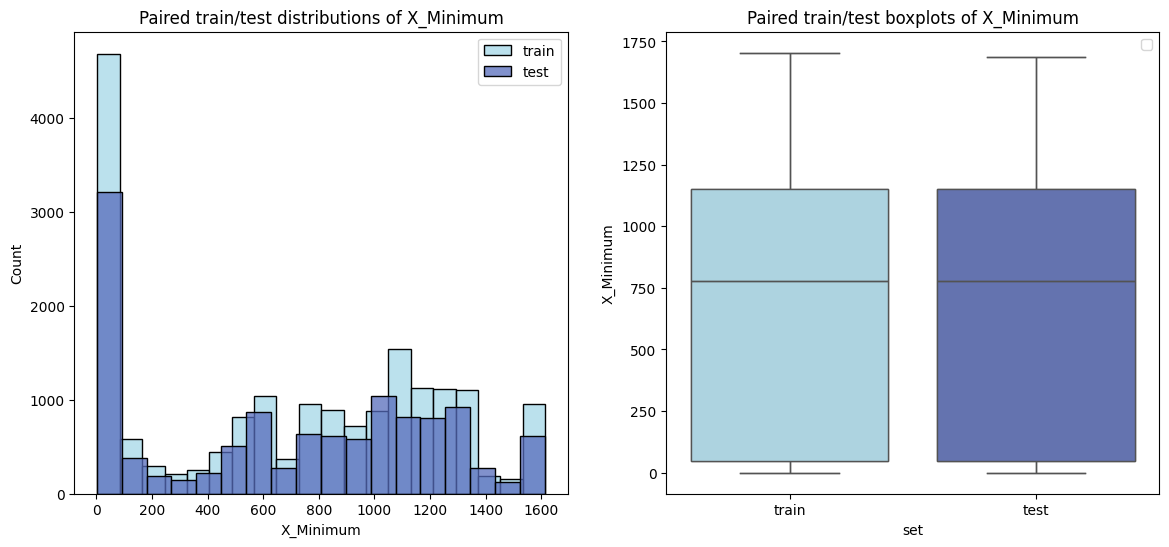

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


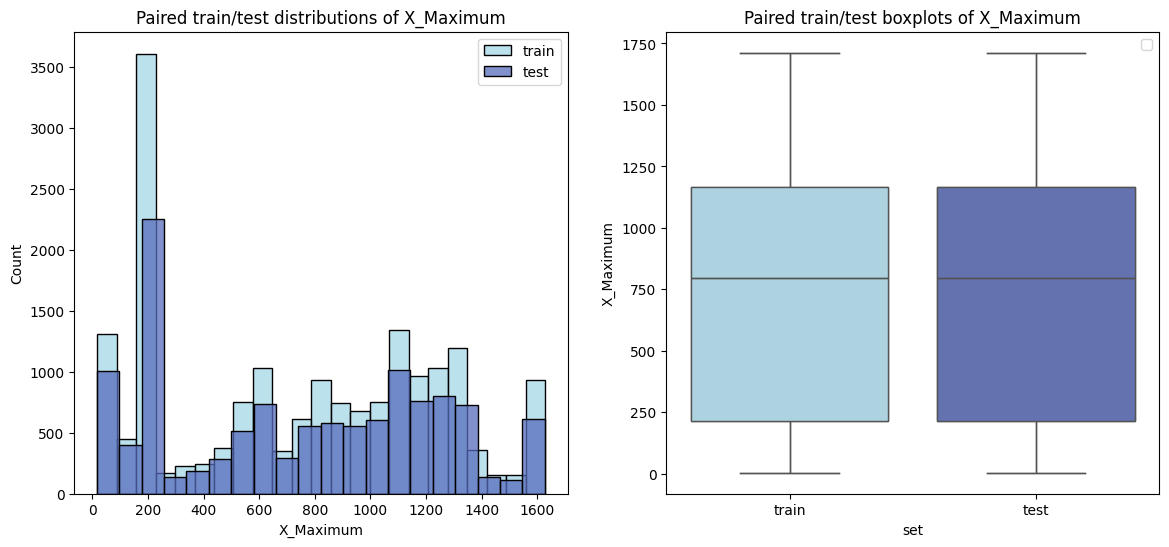

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


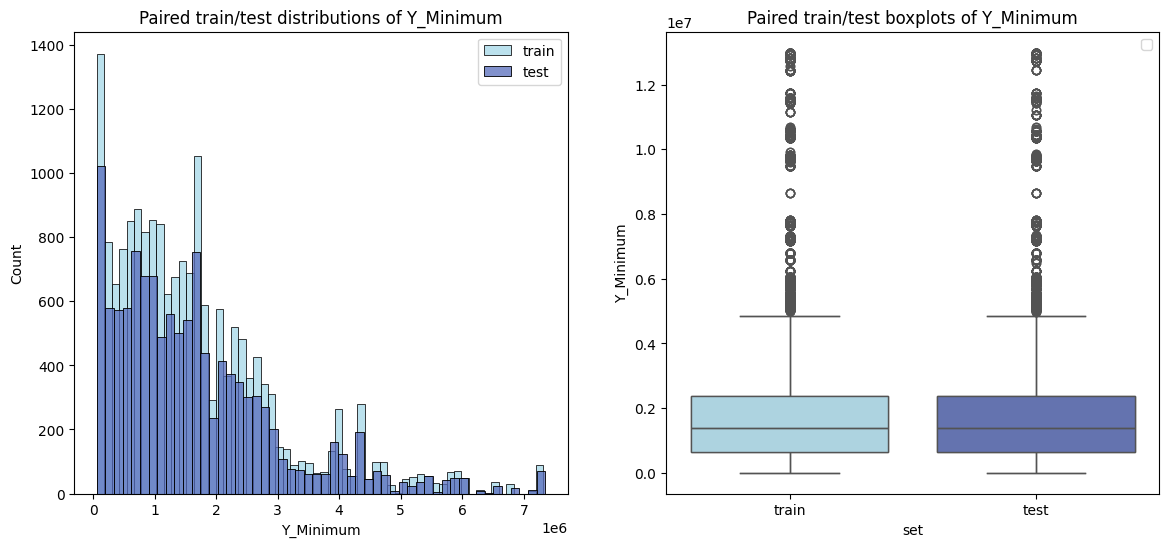

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


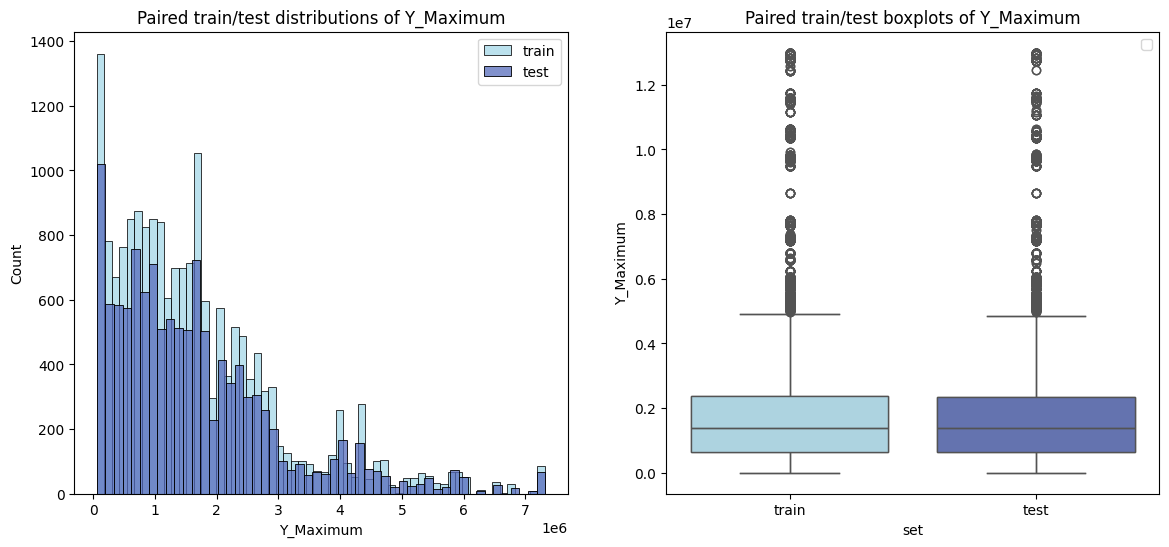

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


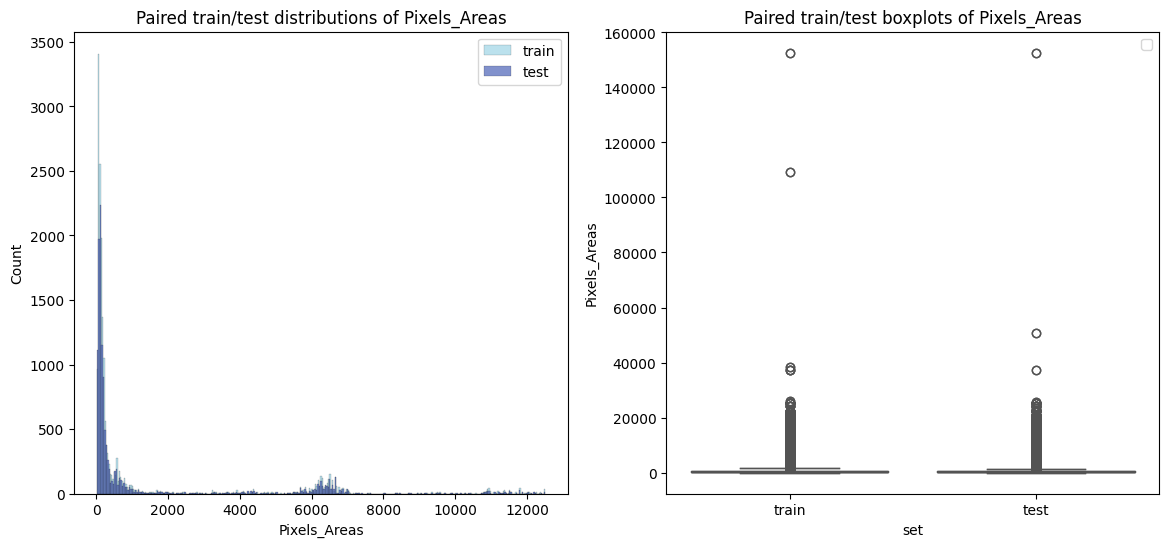

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


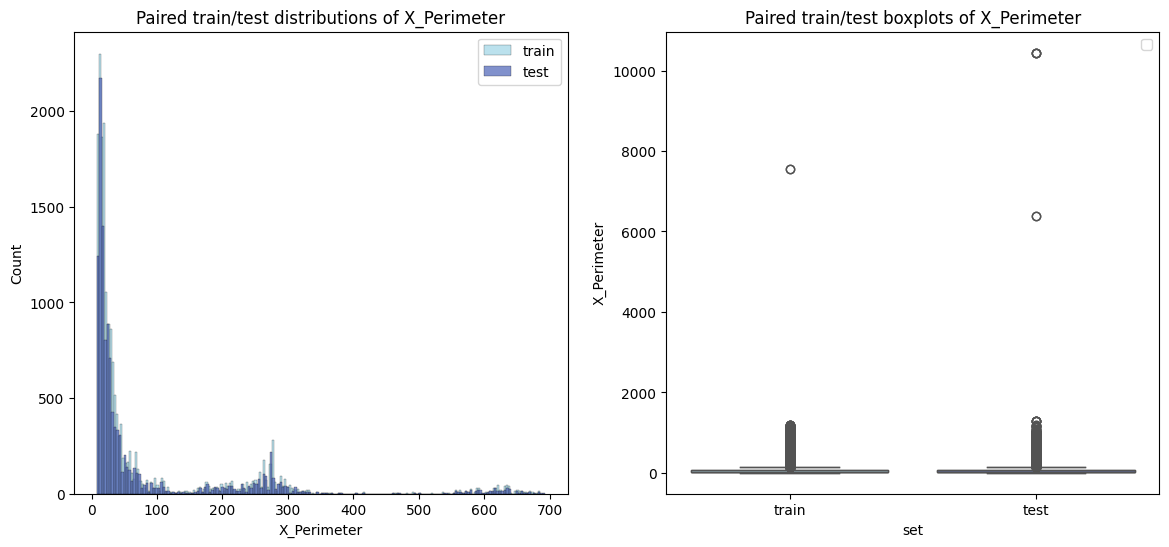

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


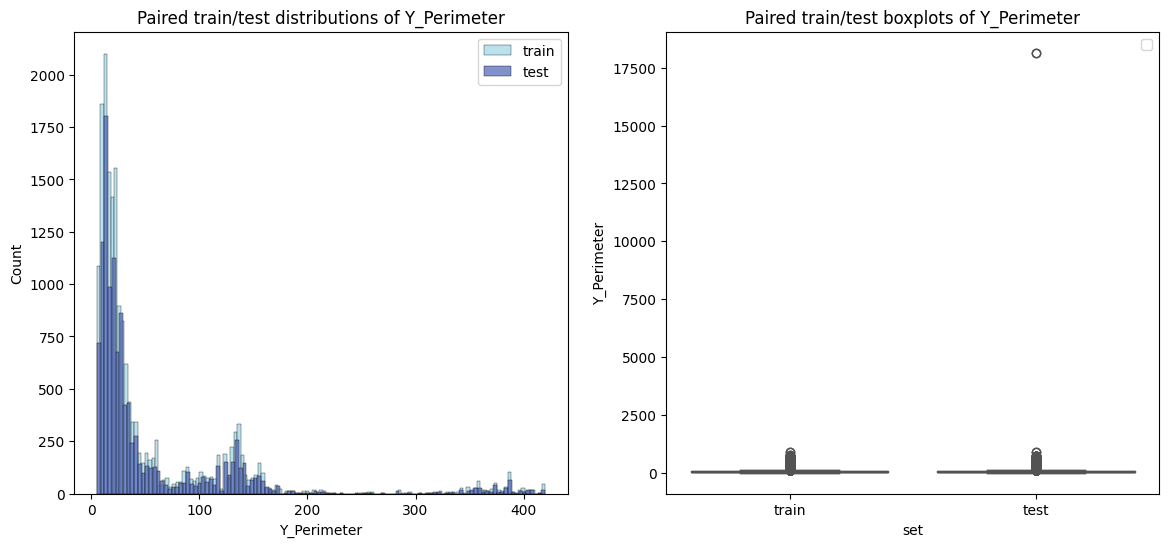

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


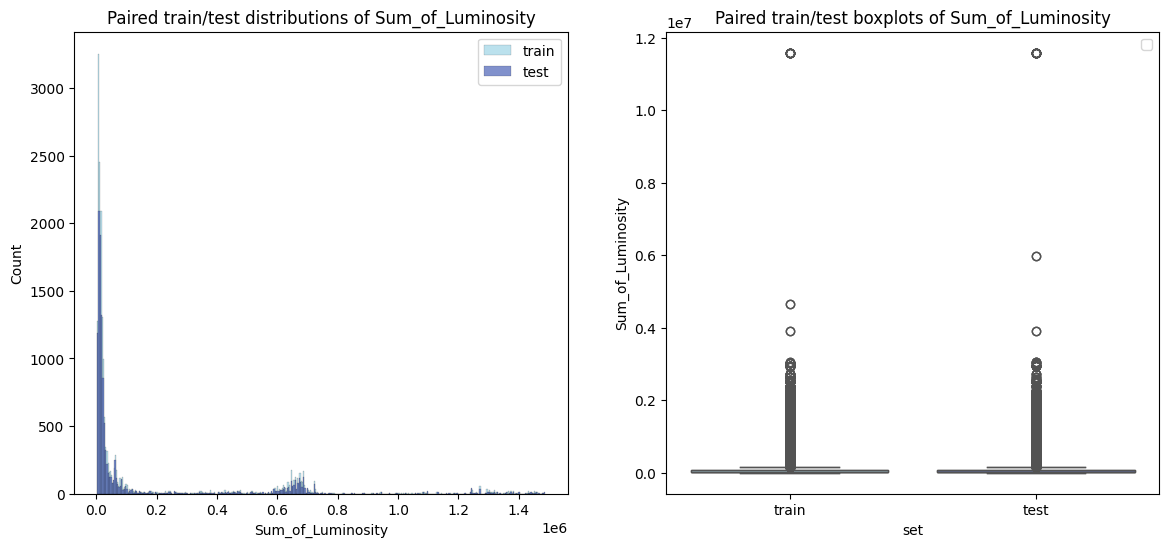

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


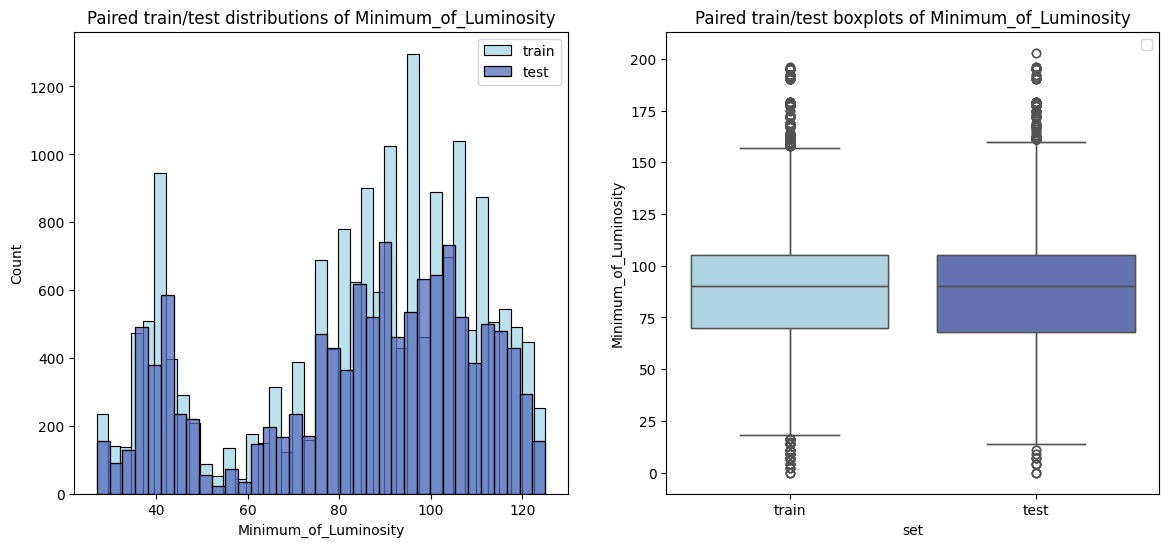

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


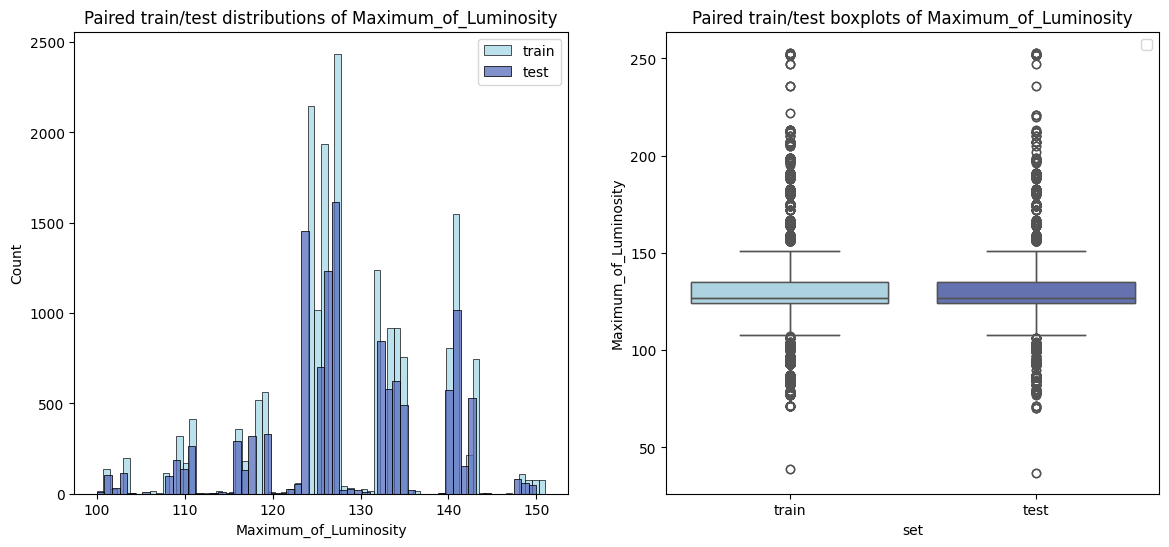

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


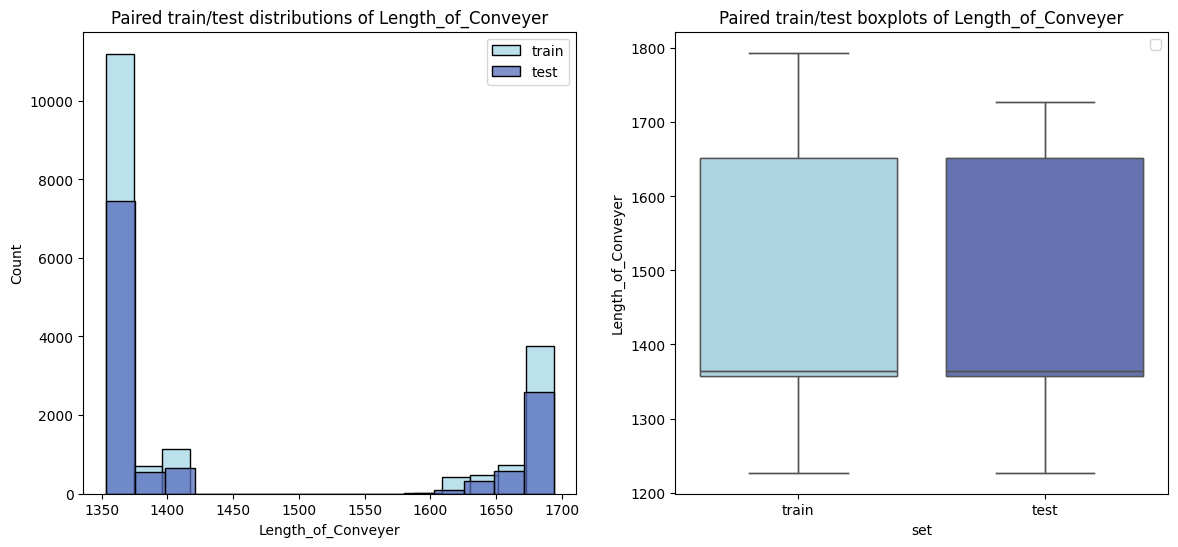

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


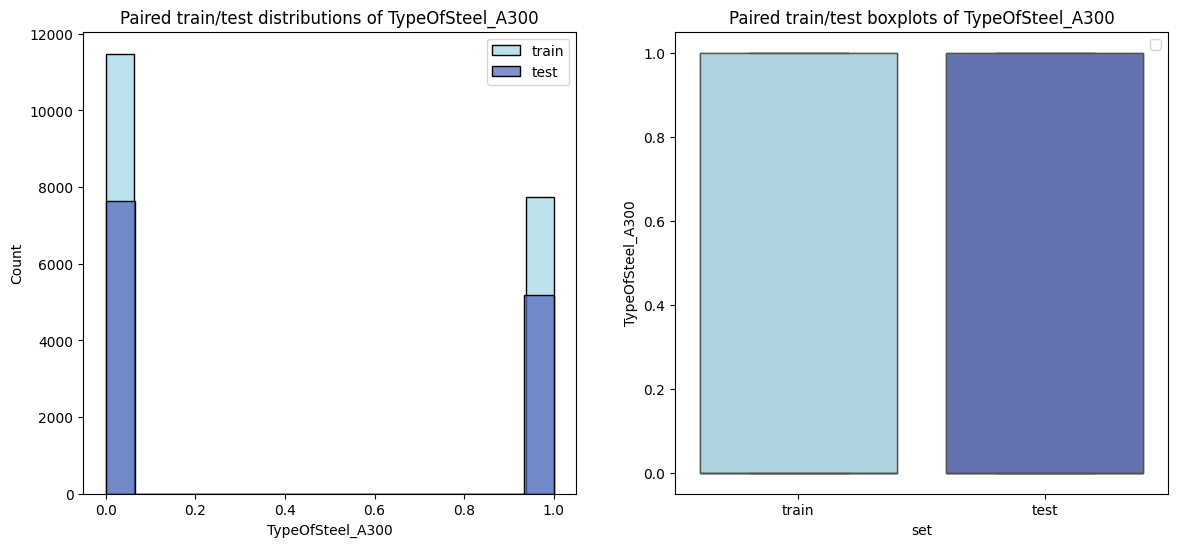

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


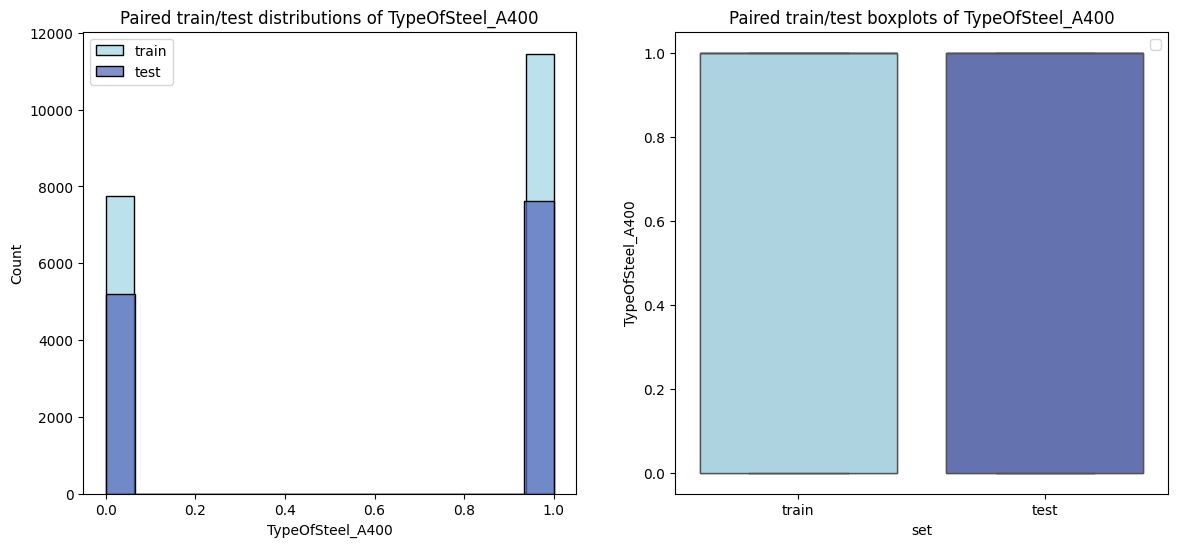

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


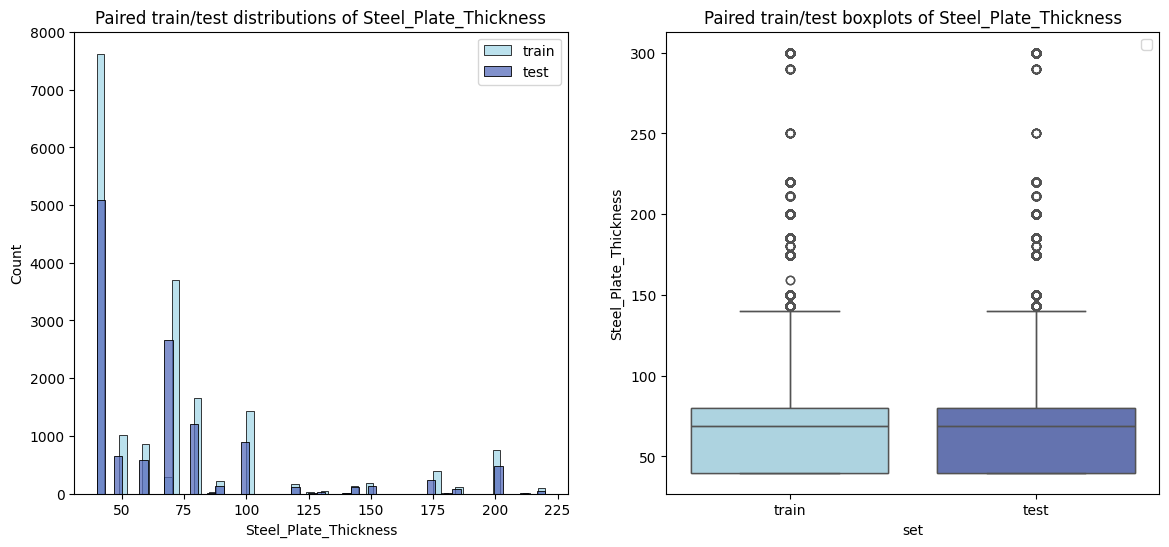

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


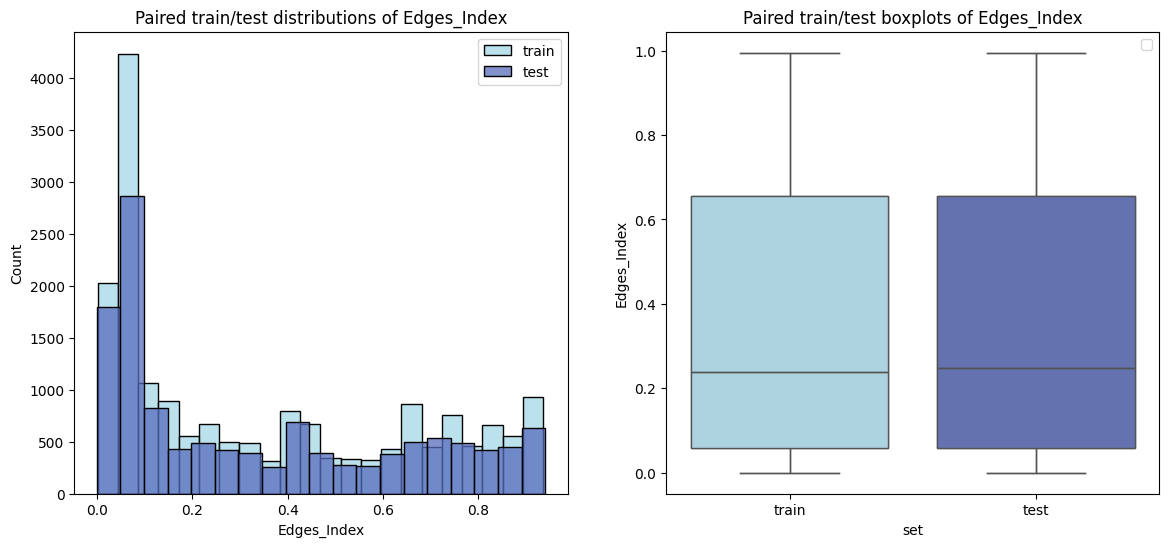

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


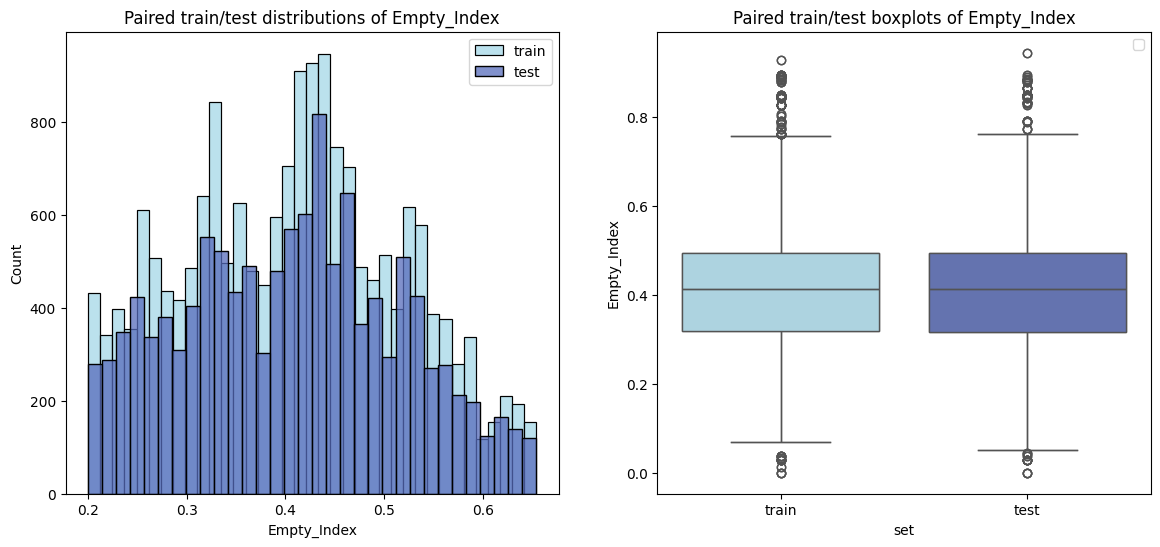

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


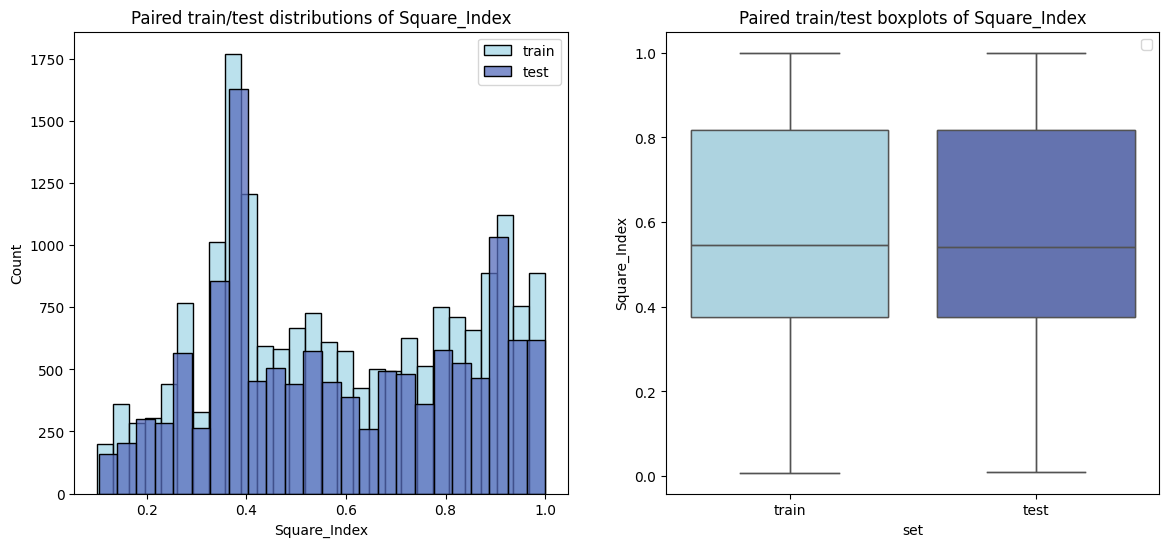

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


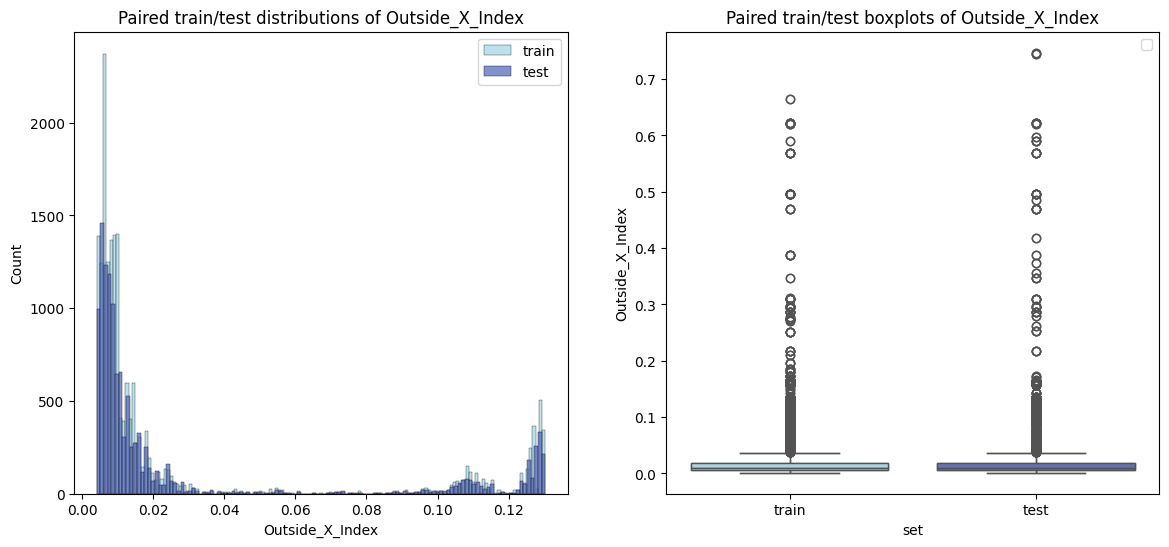

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


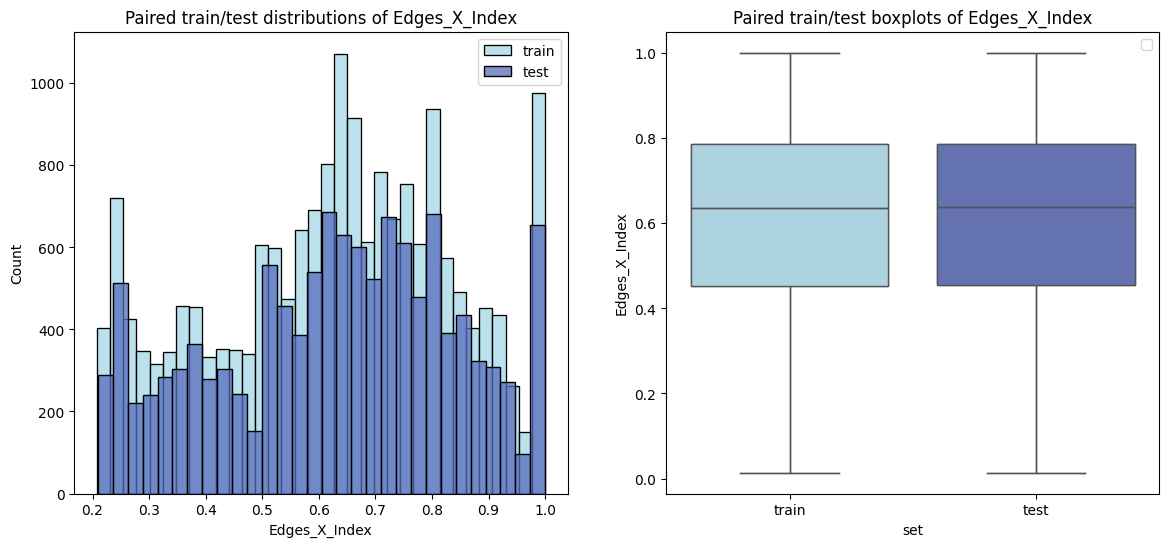

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


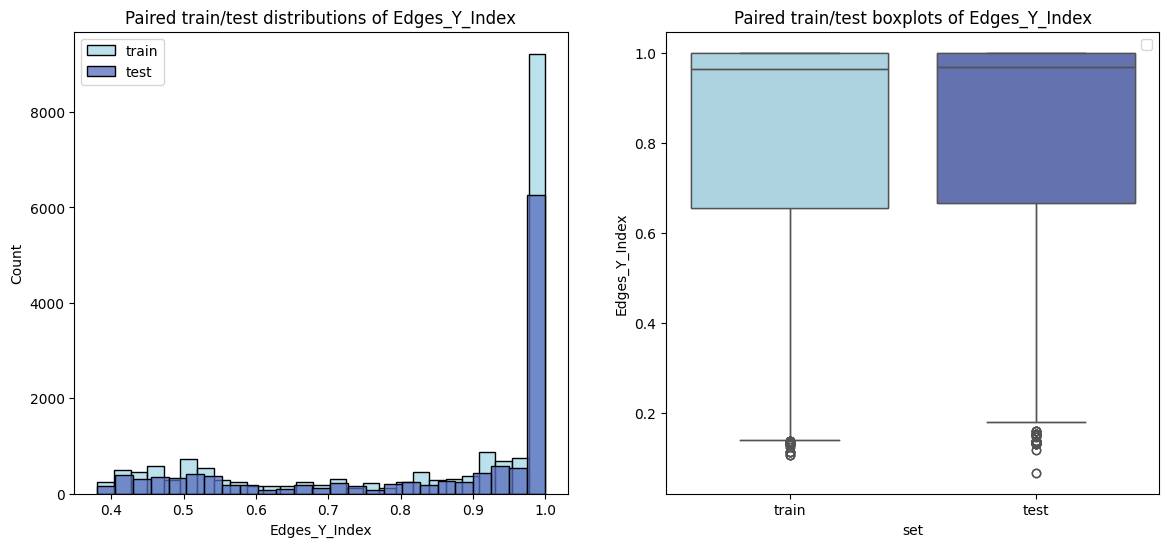

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


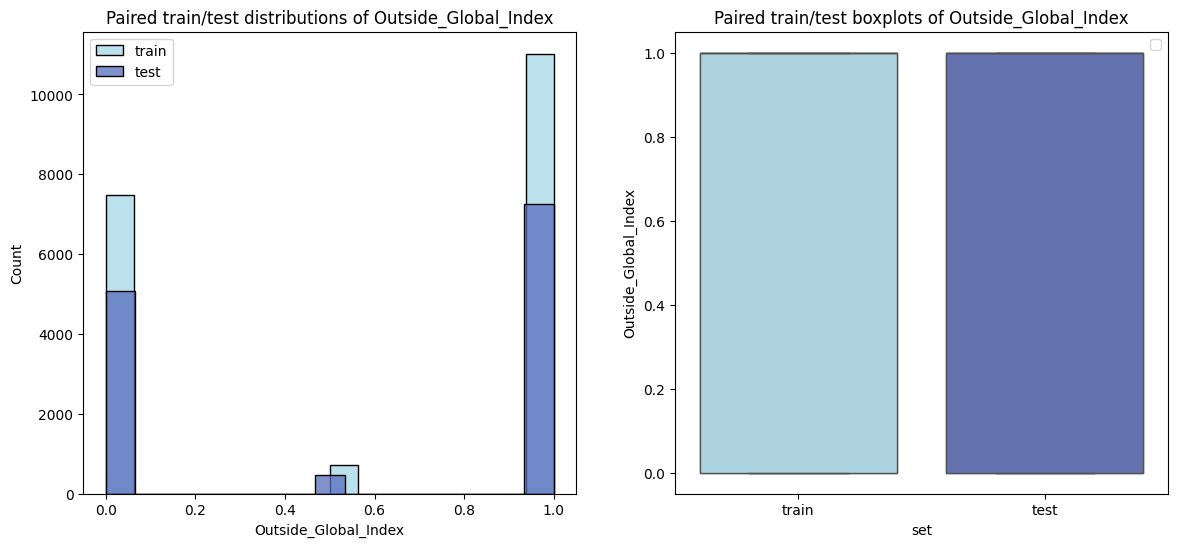

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


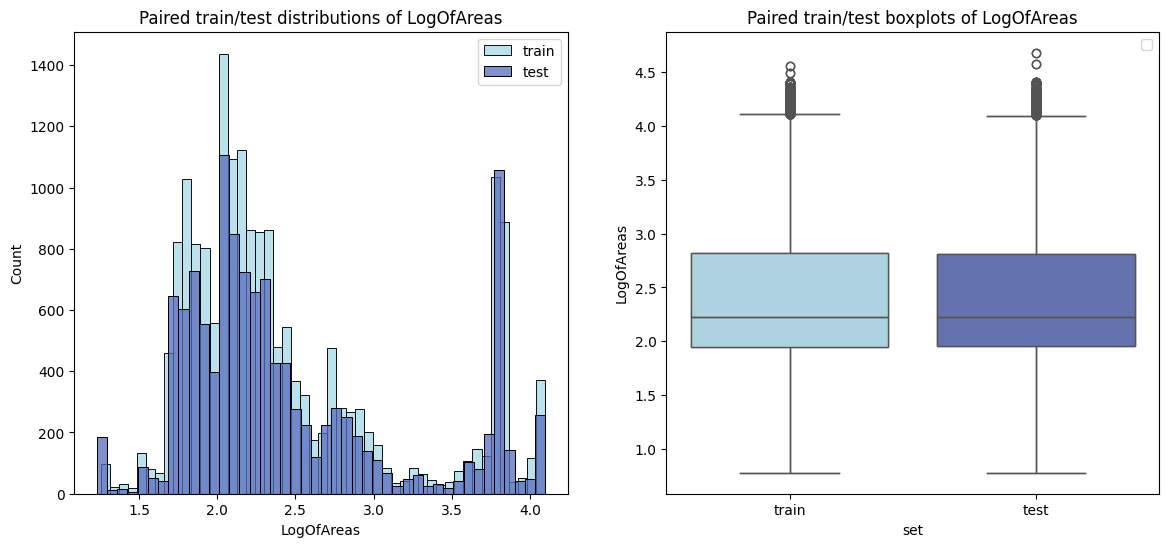

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


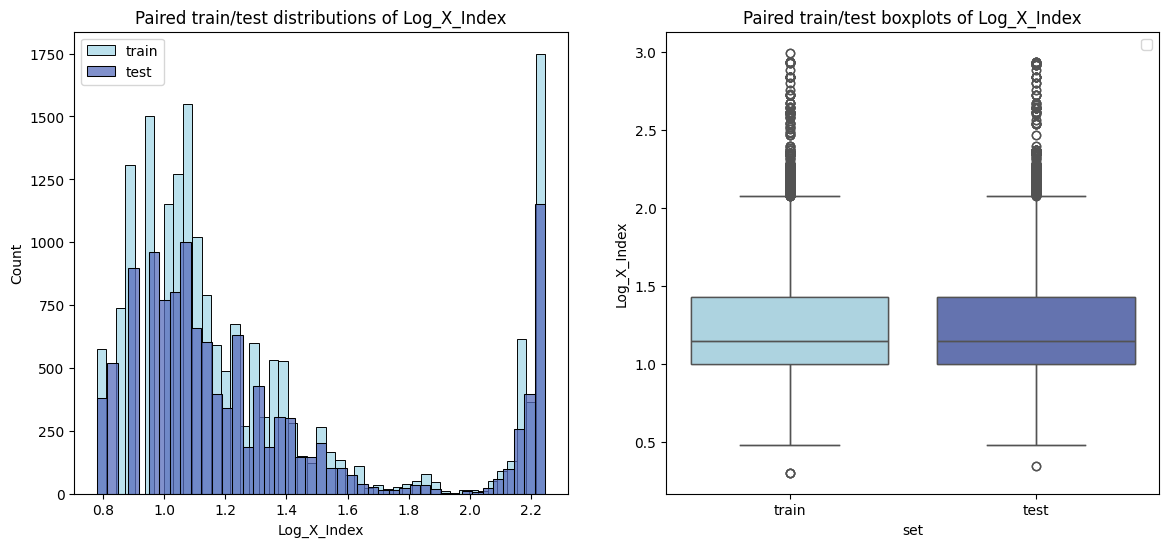

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


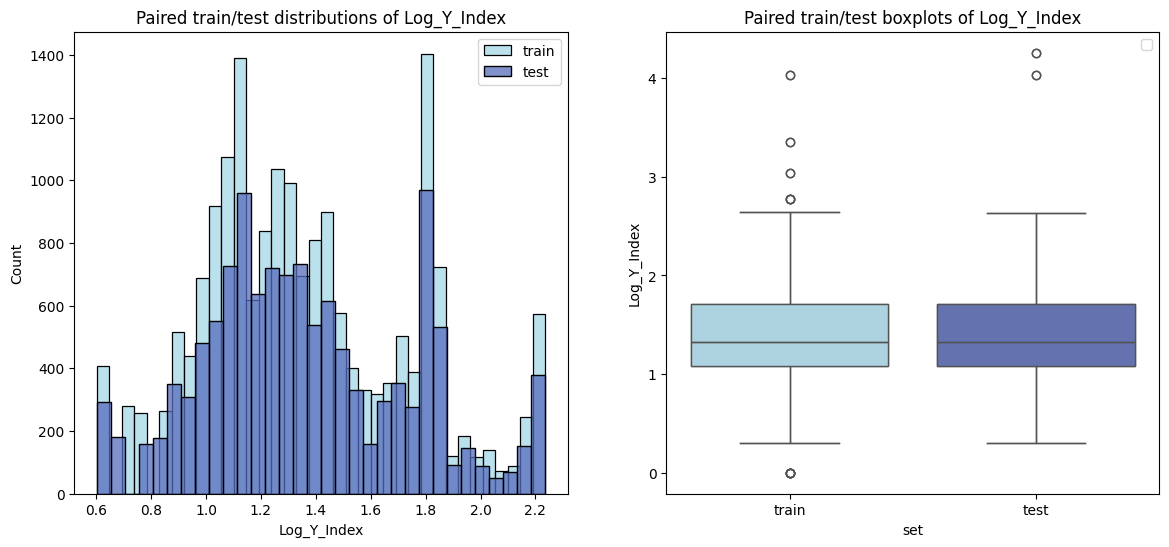

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


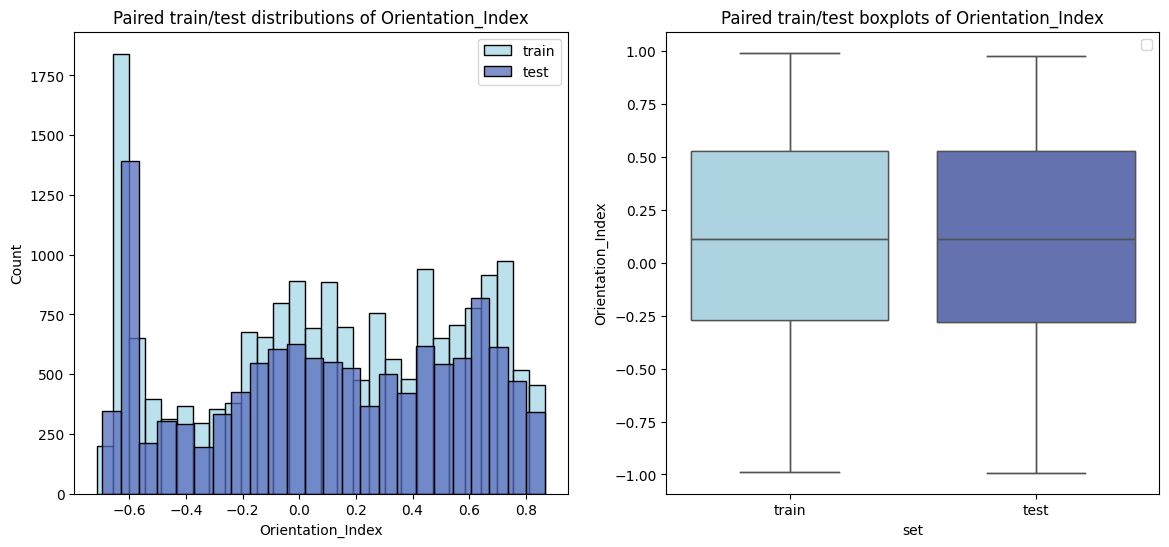

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


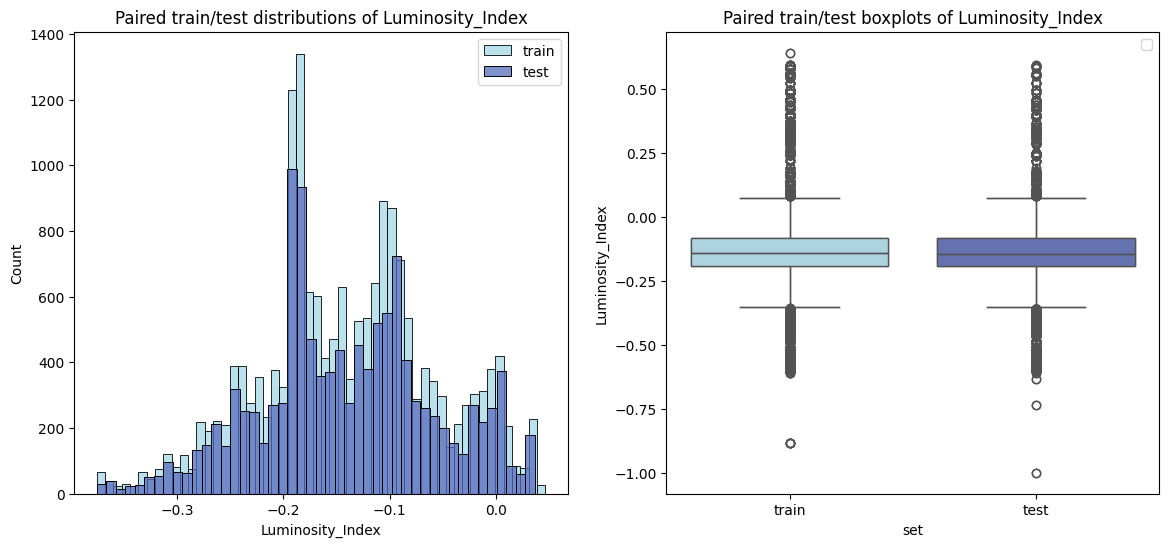

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


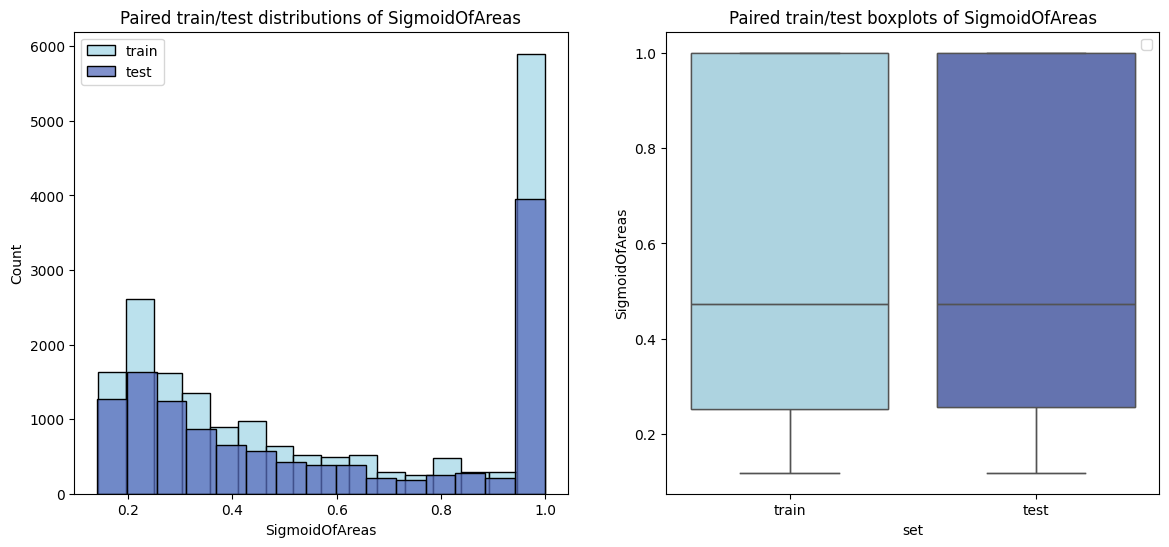

In [20]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        q_025, q_975 = np.percentile(selection, [2.5, 97.5])
        selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
            sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    axes[1].legend()
    plt.show()


for feature in train.columns:
    plot_distribution_pairs(train, test, feature, palette=color_list)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

X =  pd.concat([train, test], axis=0)
y = [0] * len(train) + [1] * len(test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

roc-auc score: 0.496


#feature engineering

In [22]:
def calculate_coordinate_range_features(data):
    data['X_Range'] = (data['X_Maximum'] - data['X_Minimum'])
    data['Y_Range'] =( data['Y_Maximum'] - data['Y_Minimum'])
    return data

train = calculate_coordinate_range_features(train)
test = calculate_coordinate_range_features(test)

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


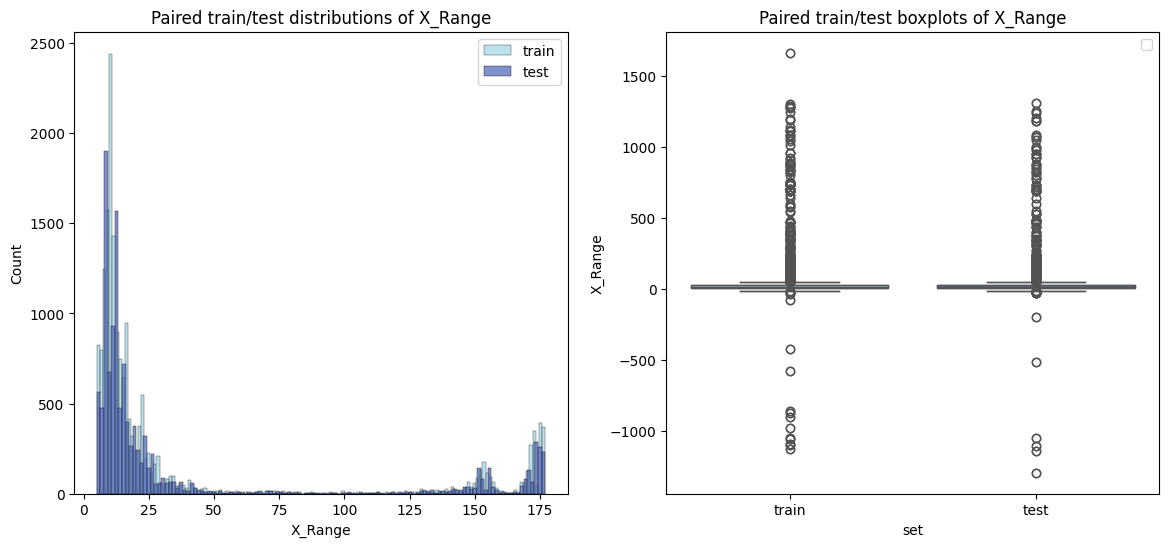

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


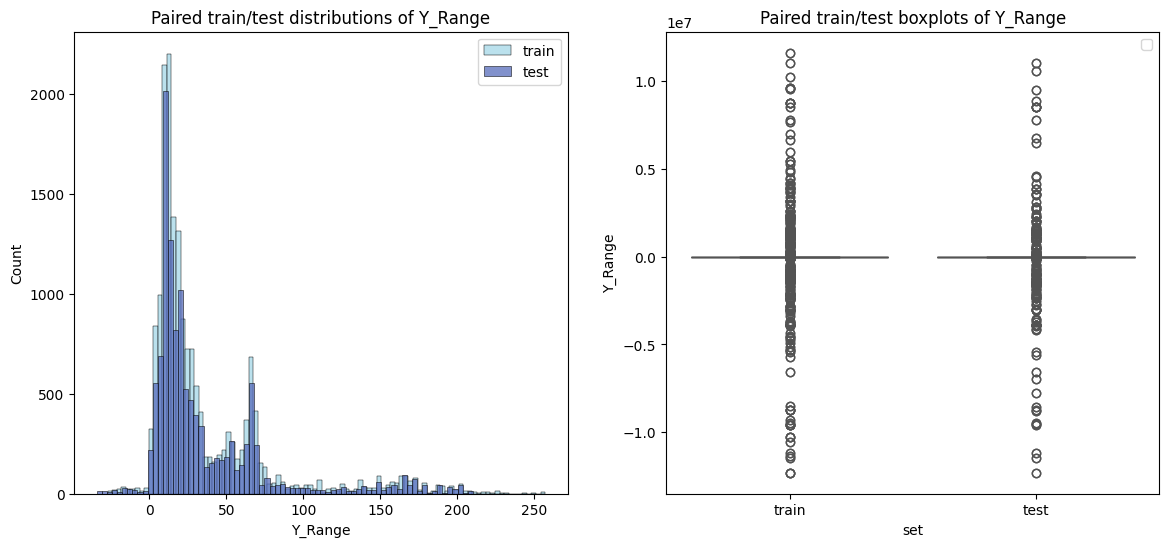

In [23]:
plot_distribution_pairs(train, test, feature="X_Range", palette=color_list)
plot_distribution_pairs(train, test, feature="Y_Range", palette=color_list)

In [24]:
def calculate_size_ratio_features(data):
    data['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    return data

train = calculate_size_ratio_features(train)
test = calculate_size_ratio_features(test)

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


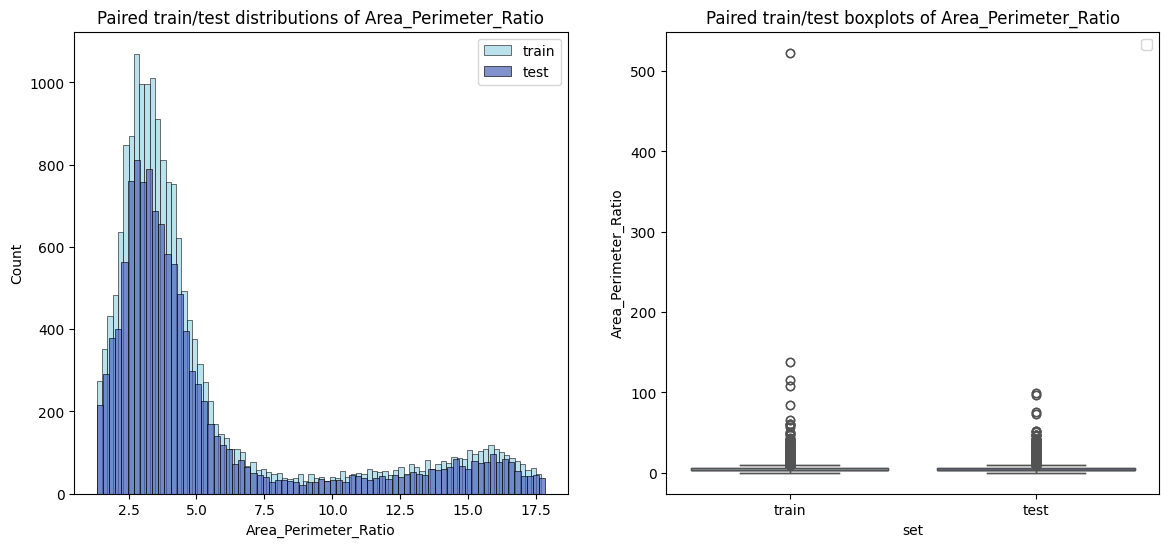

In [25]:
plot_distribution_pairs(train, test, feature="Area_Perimeter_Ratio", palette=color_list)

In [26]:
def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data

train = calculate_luminosity_range_feature(train)
test = calculate_luminosity_range_feature(test)

<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
<ipython-input-20-1216f7aec6fc>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])


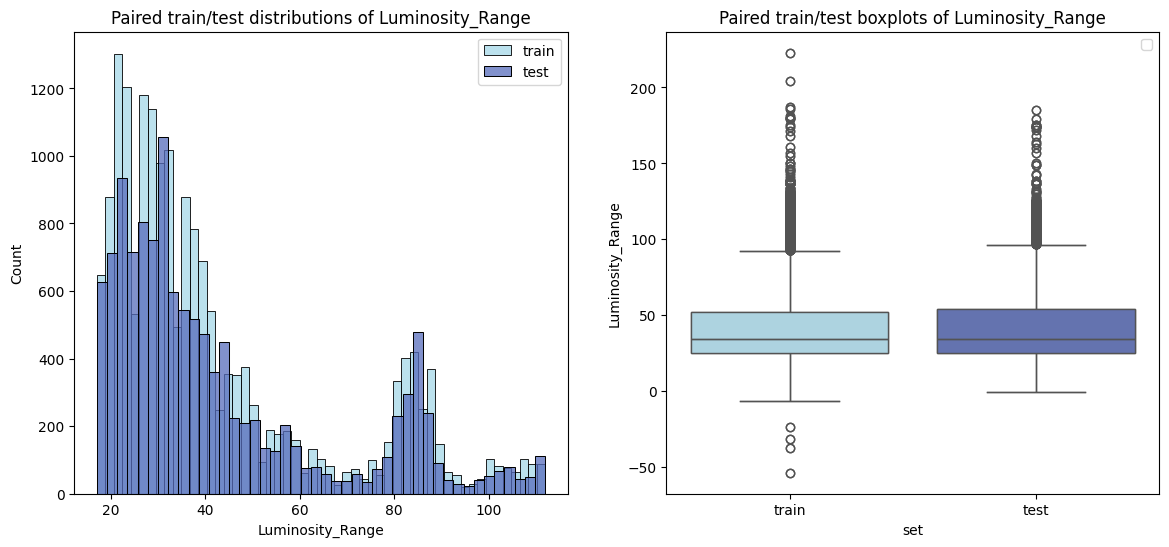

In [27]:
plot_distribution_pairs(train, test, feature="Luminosity_Range", palette=color_list)

#Modelling

In [28]:
from sklearn.preprocessing import MinMaxScaler

train = train.astype(np.float64)
test = test.astype(np.float64)

mmscaler = MinMaxScaler()

mmscaler.fit(train)

train[:] = mmscaler.transform(train)
test[:] = mmscaler.transform(test)

In [29]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target)

In [30]:
list(cv_splits)

[(array([    0,     2,     3, ..., 19216, 19217, 19218]),
  array([    1,     9,    23, ..., 19196, 19201, 19213])),
 (array([    0,     1,     2, ..., 19215, 19216, 19218]),
  array([    7,     8,    20, ..., 19194, 19195, 19217])),
 (array([    0,     1,     2, ..., 19216, 19217, 19218]),
  array([    3,    10,    11, ..., 19205, 19211, 19215])),
 (array([    0,     1,     2, ..., 19214, 19215, 19217]),
  array([    5,     6,    18, ..., 19209, 19216, 19218])),
 (array([    1,     3,     5, ..., 19216, 19217, 19218]),
  array([    0,     2,     4, ..., 19210, 19212, 19214]))]

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier

cv_splits = cv.split(train, y=target)
roc_auc_scores = list()
cv_oof = pd.DataFrame(np.zeros((len(target), len(target_classes))), columns=target_classes)

for train_idx, val_idx in cv_splits:

    xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="hist",
                        objective='multi:softmax',  # 'multi:softmax' or 'multi:softprob' for multiclass classification
                        num_class=len(set(target)),  # Number of classes
                        n_estimators=300,
                        max_depth=6,
                        verbosity=0)

    X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    xgb.fit(X_train_fold, y_train_fold)

    y_val_prob = xgb.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr')

    cv_oof.iloc[val_idx, :] = y_val_prob

    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')
print(f'Min ROC-AUC score: {roc_auc_min:.3f}')

Cross-validated ROC-AUC score: 0.872 +/- 0.004
Max ROC-AUC score: 0.876
Min ROC-AUC score: 0.865


#error analysis

In [34]:

!pip install optuna
import optuna
from optuna.samplers import TPESampler

# Activate optuna search by setting run_optimization to True
run_optimization = False

def objective(trial):

    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),

    }

    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "hist"


    cv_splits = cv.split(train, y=target)
    cv_scores = list()

    for train_idx, val_idx in cv_splits:

        xgb = XGBClassifier(**params)

        X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        xgb.fit(X_train_fold, y_train_fold)

        y_val_prob = xgb.predict_proba(X_val_fold)
        cv_scores.append(roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr'))

    cv_evaluation = np.mean(cv_scores)

    return cv_evaluation

if run_optimization:

    sqlite_db = "sqlite:///sqlite.db"
    study_name = "multi_class_prediction_of_obesity_risk"
    study = optuna.create_study(storage=sqlite_db, study_name=study_name,
                                sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                                direction="maximize", load_if_exists=True)

    study.optimize(objective, n_trials=100)
    best_cls_params = study.best_params
    best_value = study.best_value

else:

    best_value = 0.88887
    best_cls_params = {'grow_policy': 'depthwise',
                       'n_estimators': 785,
                       'learning_rate': 0.020726270353596147,
                       'gamma': 0.13894214878891328,
                       'subsample': 0.6931112900708679,
                       'colsample_bytree': 0.5210477365658035,
                       'max_depth': 3,
                       'min_child_weight': 2,
                       'reg_lambda': 5.369876648869387e-06,
                       'reg_alpha': 8.428323563897863e-09}

print(f"best optmized accuracy: {best_value:0.5f}")
print(f"best hyperparameters: {best_cls_params}")

best_cls_params['objective'] = 'multi:softmax'
best_cls_params['tree_method'] = "hist"
best_cls_params["device"] = "cuda"
best_cls_params["verbosity"] = 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00
best optmized accuracy: 0.88887
best hyperparameters: {'grow_policy': 'depthwise', 'n_estimators': 785, 'learning_rate': 0.020726270353596147, 'gamma': 0.13894214878891328, 'subsample': 0.6931112900708679, 'colsample_bytree': 0.5210477365658035, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 5.369876648869387e-06, 'reg_alpha': 8.428323563897863e-09}


In [35]:
from xgboost import XGBClassifier

xgb = xgb = XGBClassifier(**best_cls_params)
xgb.fit(train, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5210477365658035, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.13894214878891328,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.020726270353596147,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=785, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [36]:
from xgboost import DMatrix

booster = xgb.get_booster()

feature_names = train.columns
Xd = DMatrix(train)

shap_values = booster.predict(Xd, pred_contribs=True)
preds = booster.predict(Xd)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


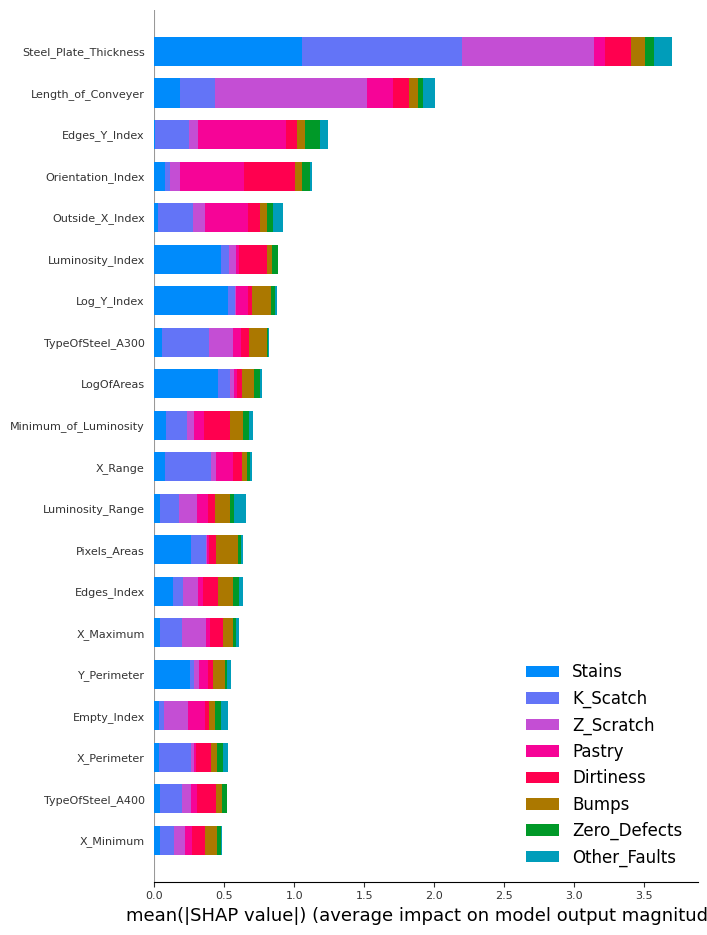

In [38]:

!pip install shap
import shap
import matplotlib.pyplot as plt

shap.summary_plot(
    [shap_values[:, k, :-1] for k in range(shap_values.shape[1])],
    train.values,
    plot_type="bar",
    feature_names=feature_names,
    class_names=target_classes,
    show=False,
)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()
print()

VIOLIN PLOT REPRESENTING <Zero_Defects>


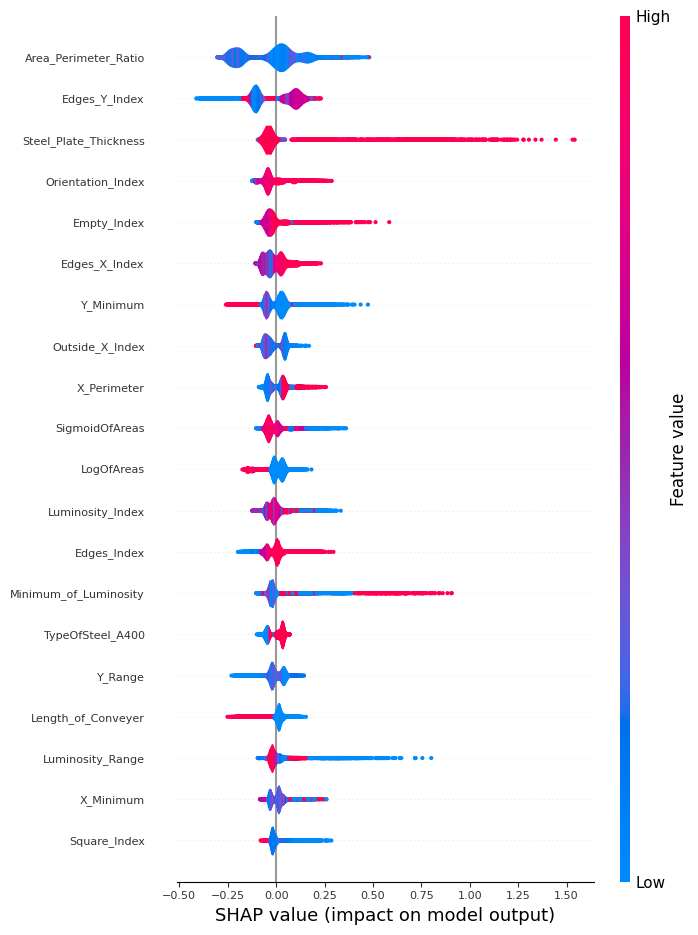


VIOLIN PLOT REPRESENTING <Pastry>


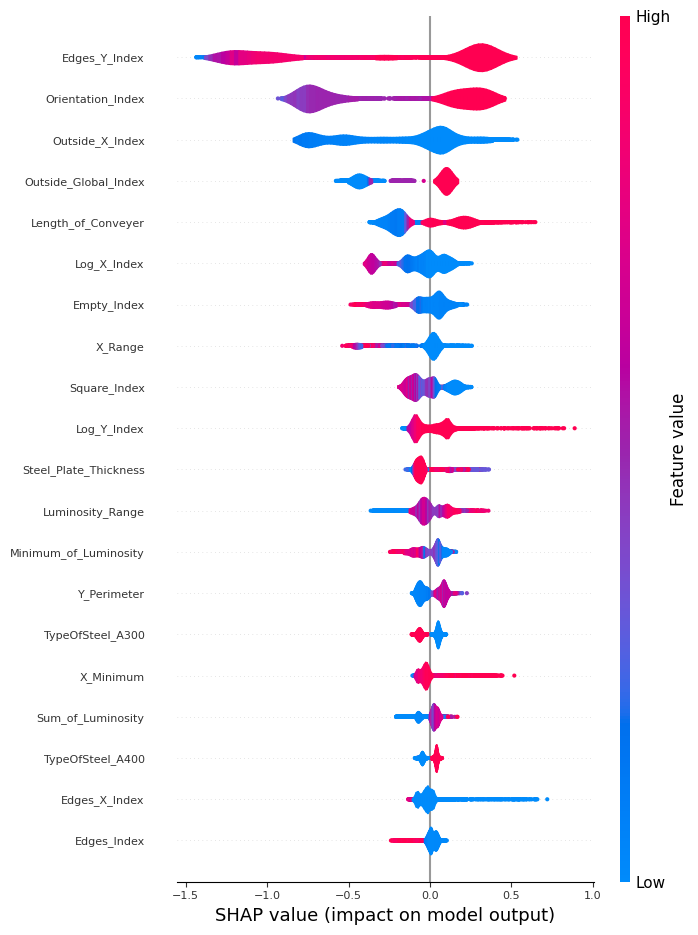


VIOLIN PLOT REPRESENTING <Z_Scratch>


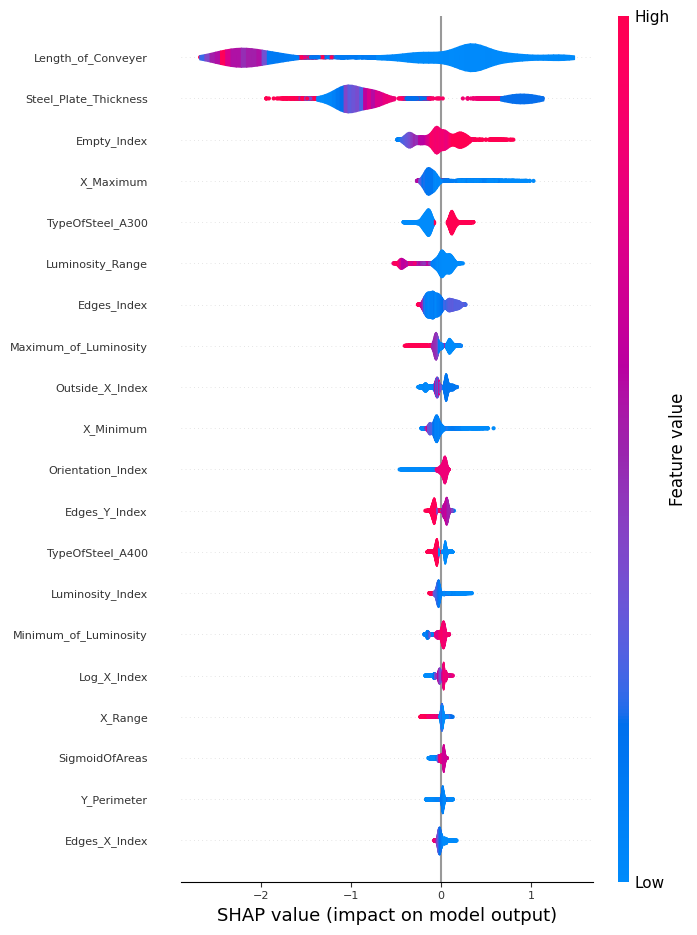


VIOLIN PLOT REPRESENTING <K_Scatch>


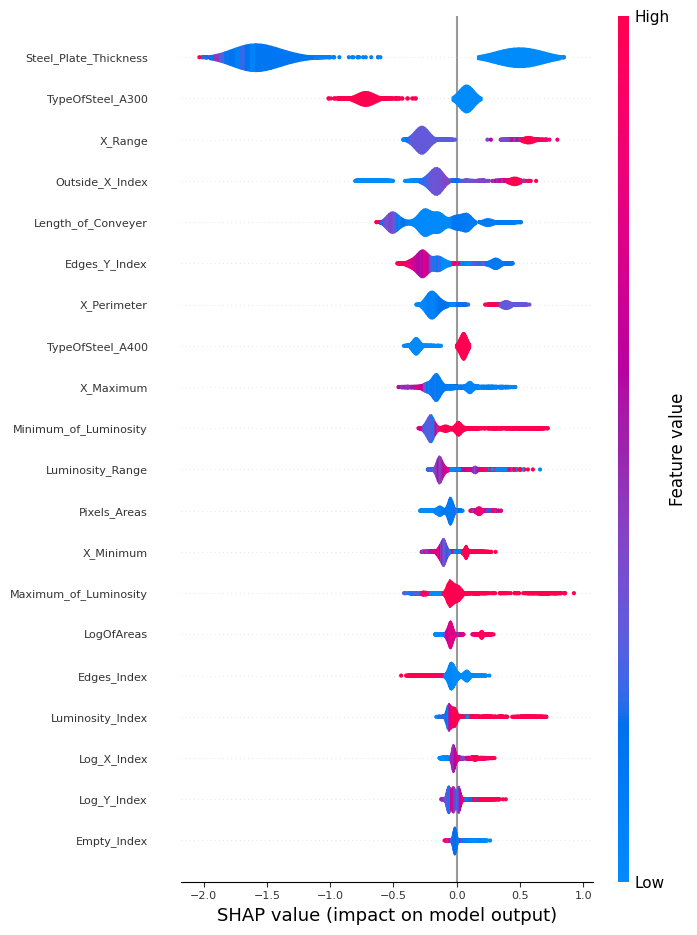


VIOLIN PLOT REPRESENTING <Stains>


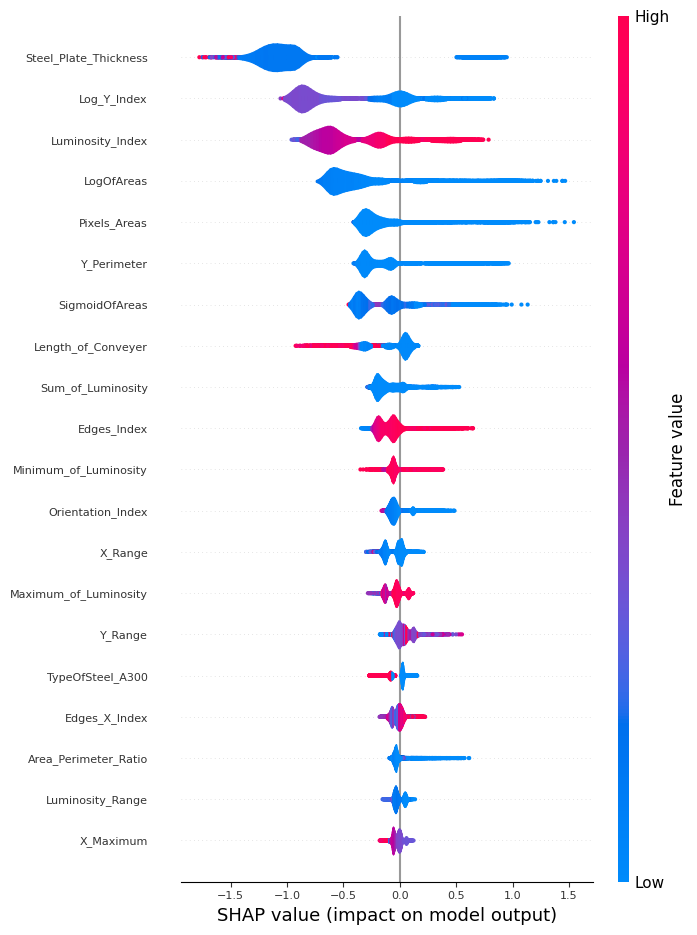


VIOLIN PLOT REPRESENTING <Dirtiness>


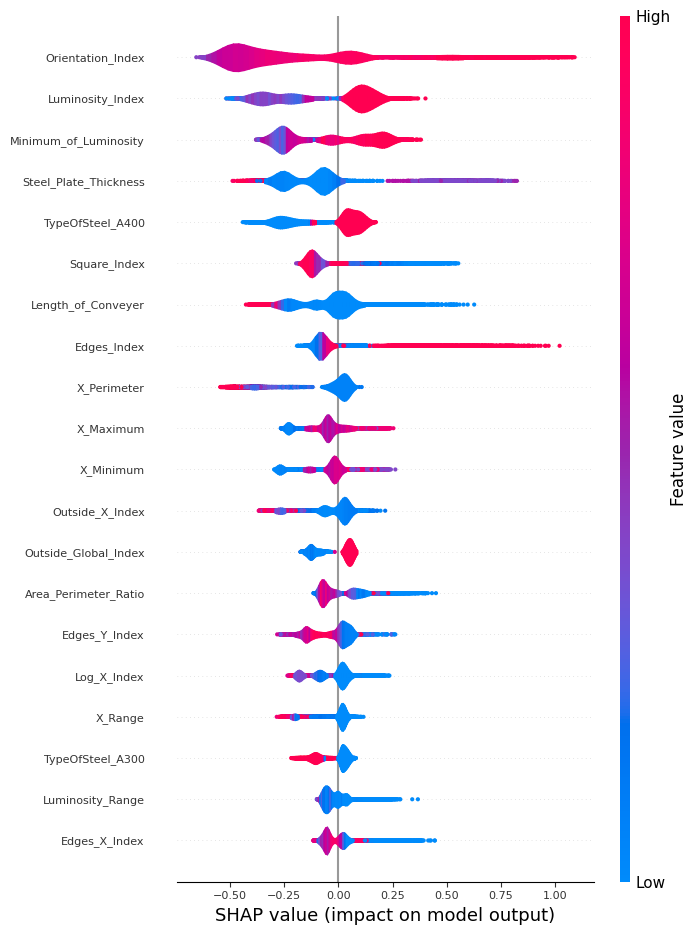


VIOLIN PLOT REPRESENTING <Bumps>


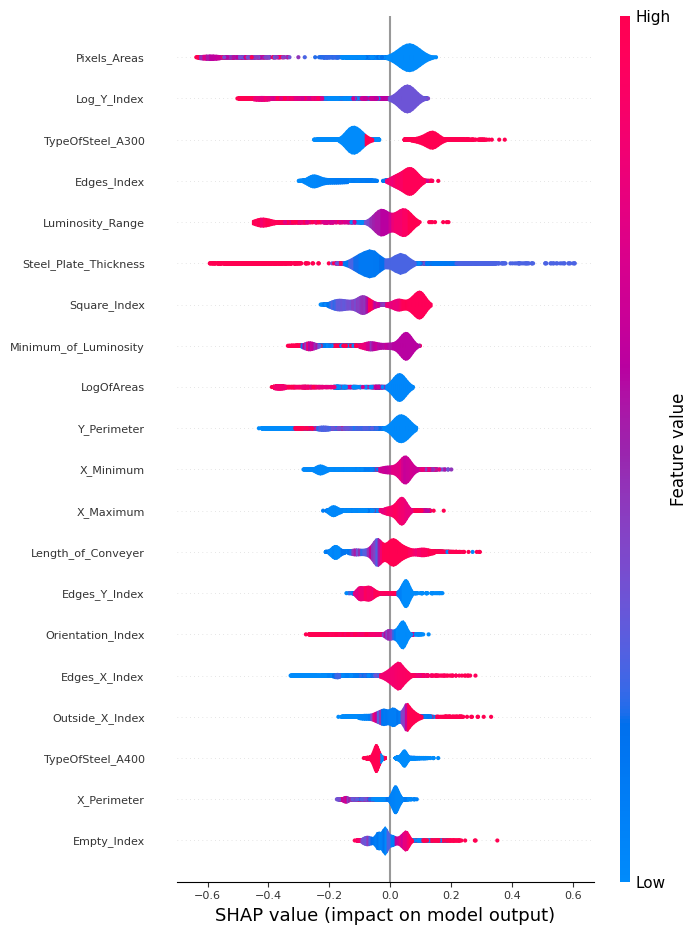


VIOLIN PLOT REPRESENTING <Other_Faults>


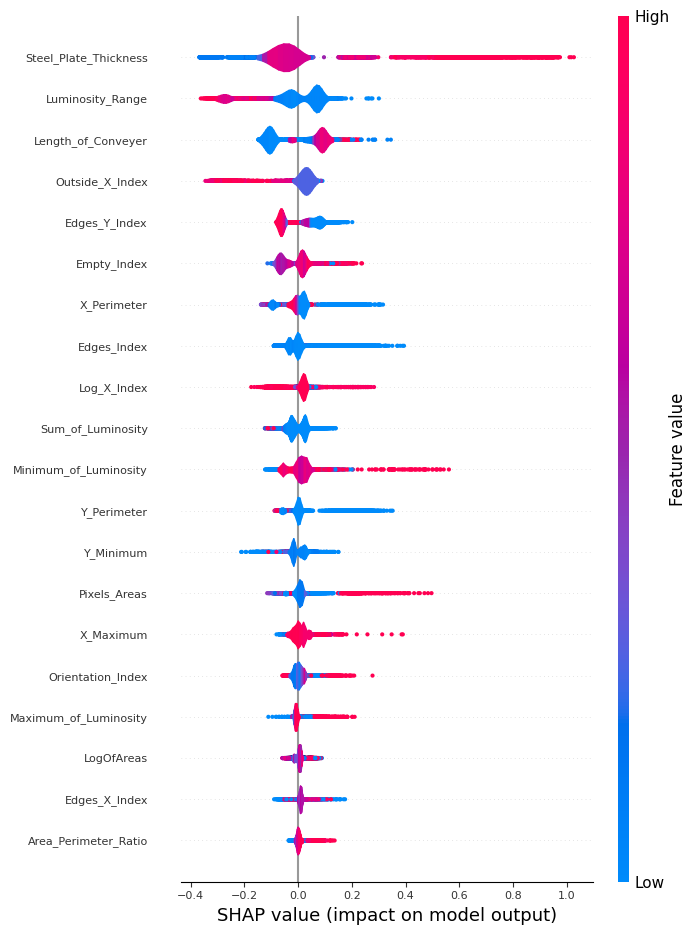

In [39]:
for k, target_label in enumerate(target_classes):
    print(f"VIOLIN PLOT REPRESENTING <{target_label}>")
    shap.summary_plot(shap_values[:,k, :-1], train.values,
                      plot_type="violin",
                      feature_names=feature_names, show=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
    print()

In [40]:
def compute_oof(X, y, model, model_params, cv_strategy):

    cv_splits = cv_strategy.split(X, y=y)
    cv_oof = pd.DataFrame(np.zeros((len(y), len(target_classes))), columns=target_classes)

    for train_idx, val_idx in cv_splits:

        instantiated_model = model(**model_params)

        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        instantiated_model.fit(X_train_fold, y_train_fold)

        y_val_prob = instantiated_model.predict_proba(X_val_fold)
        cv_oof.iloc[val_idx, :] = y_val_prob

    return cv_oof

In [41]:
xgb_preds = xgb.predict_proba(test)
xgb_oof = compute_oof(train, target, XGBClassifier, best_cls_params, cv)

In [42]:
!pip -q install pyarrow_hotfix
import pyarrow_hotfix
from lightgbm import LGBMClassifier

In [43]:
parameters_dict = {
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "metric": "multi_logloss",
    "num_class": len(target_classes),
    "verbosity": -1,
    'n_estimators': 315,
    'learning_rate': 0.038927375208580535,
    'max_depth': 4,
    'min_data_in_leaf': 274,
    'subsample_freq': 9,
    'feature_fraction': 0.36072715109677717,
    'reg_lambda': 79.31416605346095,
    'reg_alpha': 3.2965928880922615,
    'subsample': 0.9862207095636681,
}

lgb = LGBMClassifier(**parameters_dict)

lgb.fit(train, target)
lgb_preds = lgb.predict_proba(test)

lgb_oof = compute_oof(train, target, LGBMClassifier, parameters_dict, cv)

In [44]:
xgb_oof = MinMaxScaler().fit_transform(xgb_oof)
lgb_oof = MinMaxScaler().fit_transform(lgb_oof)
xgb_preds = MinMaxScaler().fit_transform(xgb_preds)
lgb_preds = MinMaxScaler().fit_transform(lgb_preds)

In [45]:
xgb_score = roc_auc_score(targets_bin, xgb_oof[:, 1:], multi_class='ovr')
lgb_score = roc_auc_score(targets_bin, lgb_oof[:, 1:], multi_class='ovr')

print(f"oof roc-auc score for XGB  model: {xgb_score:0.5f}")
print(f"oof roc-auc score for LGBM model: {lgb_score:0.5f}")

oof roc-auc score for XGB  model: 0.88842
oof roc-auc score for LGBM model: 0.88816


In [46]:
from functools import partial
from scipy.optimize import minimize

blend = np.zeros((xgb_oof.shape[0], xgb_oof.shape[1]-1))
preds = np.zeros((xgb_preds.shape[0], xgb_preds.shape[1]-1))

initial_weights = np.array([0.5, 0.5])

def calculate_roc_auc(weights, oof_1, oof_2, target):
    # Normalize weights
    weights /= np.sum(weights)

    # Calculate weighted sum
    weighted_sum = oof_1 * weights[0] + oof_2 * weights[1]

    # Calculate ROC AUC score
    score = roc_auc_score(target, weighted_sum)

    # Return the sum of ROC AUC scores
    return score * -1  # Minimize negative sum to maximize sum of ROC AUC scores

for k in range(len(target_classes)-1):
    result = minimize(partial(calculate_roc_auc,
                              oof_1=xgb_oof[:, k + 1],
                              oof_2=lgb_oof[:, k + 1],
                              target=targets_bin.iloc[:, k]),
                      initial_weights,
                      method='Nelder-Mead')
    optimal_weights = result.x
    print(f"{target_classes[k + 1]} : XGB={optimal_weights[0]:0.3f}, LGBM={optimal_weights[1]:0.3f}")
    blend[:, k] = (xgb_oof[:, k + 1] * optimal_weights[0] + lgb_oof[:, k + 1] * optimal_weights[1])
    preds[:, k] = (xgb_preds[:, k + 1] * optimal_weights[0] + lgb_preds[:, k + 1] * optimal_weights[1])

Pastry : XGB=0.638, LGBM=0.350
Z_Scratch : XGB=0.943, LGBM=0.070
K_Scatch : XGB=-0.067, LGBM=0.962
Stains : XGB=0.748, LGBM=0.237
Dirtiness : XGB=0.646, LGBM=0.336
Bumps : XGB=0.312, LGBM=0.675
Other_Faults : XGB=0.437, LGBM=0.589


In [47]:
blend_score = roc_auc_score(targets_bin, blend, multi_class='ovr')
print(f"oof roc-auc score for blend of models: {blend_score:0.5f}")

oof roc-auc score for blend of models: 0.88905


In [50]:
submission = pd.read_csv("/content/drive/MyDrive/Steel_plate /sample_submission.csv")
submission.iloc[:, 1:] = preds
submission.to_csv("/content/drive/MyDrive/Steel_plate /xgb_submission.csv", index=False)

In [49]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.658796,0.001020,0.001687,0.000155,0.017757,0.149517,0.319438
1,19220,0.320026,0.019307,0.013042,0.000363,0.233505,0.198612,0.373538
2,19221,0.003885,0.049596,0.032067,0.000846,0.013032,0.388806,0.605004
3,19222,0.207640,0.001703,0.001403,0.001939,0.018976,0.453460,0.478856
4,19223,0.003553,0.002155,0.001637,0.003071,0.008842,0.720839,0.383752
